<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [40]:
import pandas as pd
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pltf

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
  
# Natural Language Tool Kit 
import nltk  
nltk.download('stopwords') 

import spacy


nlp = spacy.load("en_core_web_lg")

yelp = pd.read_json('./data/review_sample.json', lines=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\darek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [43]:
import re  
import nltk  
  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
  
corpus = []  
  

for i in range(len(yelp['text'])):  
    review = re.sub('[^a-zA-Z]', ' ', yelp['text'][i])  
    review = review.lower()  
    review = review.split()  
    ps = PorterStemmer()   
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  
    review = ' '.join(review)   
      

    corpus.append(review)  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\darek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [77]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(stop_words='english')  
  
# X contains corpus (dependent variable) 
X = cv.fit_transform(corpus).toarray()  
   
y = yelp['stars']  
cv.vocabulary_
cv._validate_vocabulary()
dtm = cv.transform(corpus)
dtm.todense() 
dtm = pd.DataFrame(dtm.todense(), columns = cv.get_feature_names())

In [78]:
dtm.shape

(10000, 18250)

In [79]:
yelp['stars'].head()

0    1
1    4
2    3
3    1
4    4
Name: stars, dtype: int64

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [80]:
# Import Statements
from sklearn.pipeline import Pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
# Create Pipeline

vect = TfidfVectorizer(stop_words='english')
sgdc = SGDClassifier()

pipe = Pipeline([('vect', vect), ('clf', sgdc)])

# Fit Pipeline
pipe.fit(yelp['text'], yelp['stars'])



D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [81]:
pipe.predict(['This has got to be the most jacked up fleeb in all the multiverse. The fleeb should be flaggered with pumple and not worgules'])

array([5], dtype=int64)

In [82]:
# Experiment Management
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'clf__max_iter':(20, 10, 100)
}
grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(yelp.text, yelp.stars)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   13.1s finished
D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.5, 0.75, 1.0), 'clf__max_iter': (20, 10, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [83]:
grid_search.predict(['This tuna was awfully good for a fish stick'])

array([4], dtype=int64)

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [84]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 20
lda_tf = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_tf.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [85]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [86]:
# Visualize the topics
pyLDAvis.sklearn.prepare(lda_tf, dtm, cv)


AttributeError: 'Series' object has no attribute 'getA1'

In [105]:

def print_top_words(model, feature_names, n_top_words=3):
    
    '''prints the top 10 words from LDA topics'''
    
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

n_topics = 20
lda_tf_title = LatentDirichletAllocation(n_components=n_topics, random_state=10)
lda_tf_title.fit(dtm)
print("\nTopics in LDA model:")
tf_feature_names = cv.get_feature_names()
print_top_words(lda_tf_title, tf_feature_names)




Topics in LDA model:
Topic #0: great time servic
Topic #1: dog time vet
Topic #2: great bar food
Topic #3: good order chicken
Topic #4: year fee great
Topic #5: coffe ice cream
Topic #6: amaz eyebrow lee
Topic #7: order time wait
Topic #8: servic work car
Topic #9: place food good
Topic #10: day said car
Topic #11: food good place
Topic #12: great place love
Topic #13: store look like
Topic #14: place like tea
Topic #15: cupcak egg park
Topic #16: place good like
Topic #17: dr offic staff
Topic #18: room hotel stay
Topic #19: le donut et



In [106]:

col_names = ["Title_Topic {0}".format(x) for x in range(0, n_topics)]
topic_dist = lda_tf_title.transform(dtm)
topic_df_title = pd.DataFrame(topic_dist, columns = col_names)


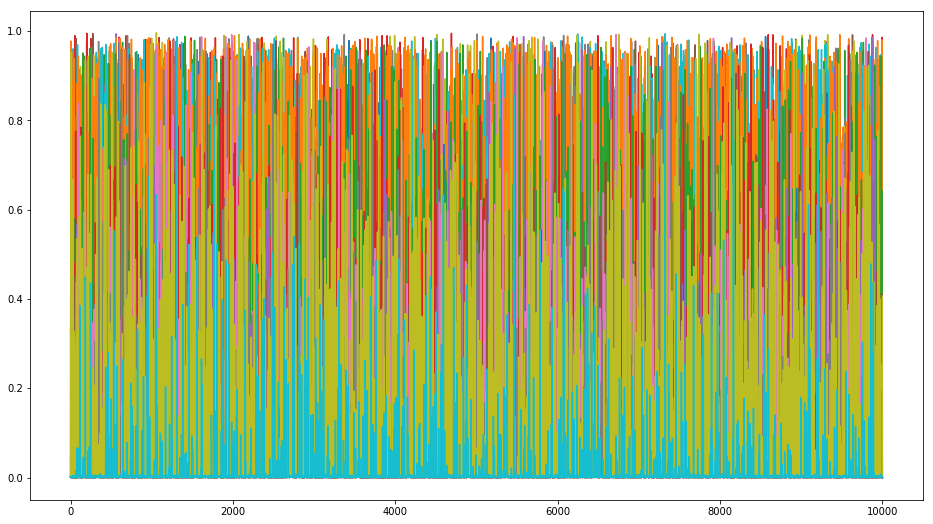

In [107]:
pltf.figure(figsize=(16,9))
pltf.plot(topic_df_title);

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)